C:\Users\hakan\AppData\Local\Temp\ipykernel_1076\3778953343.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='segment', y='total_spending', palette='Set2')


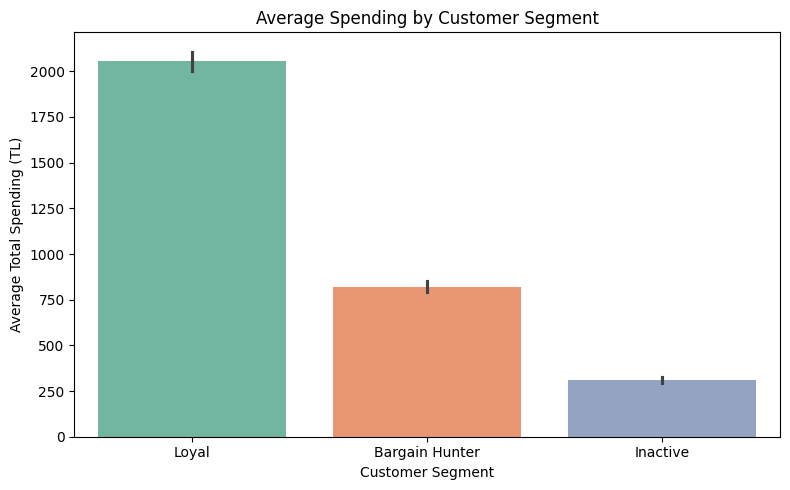

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("simulated_customer_data.csv")

# Segment adlarını daha okunabilir hale getirelim
df['segment'] = df['segment'].str.replace('_', ' ').str.title()

# Ortalama harcama grafiği
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='segment', y='total_spending', palette='Set2')
plt.title("Average Spending by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Average Total Spending (TL)")
plt.tight_layout()
plt.show()

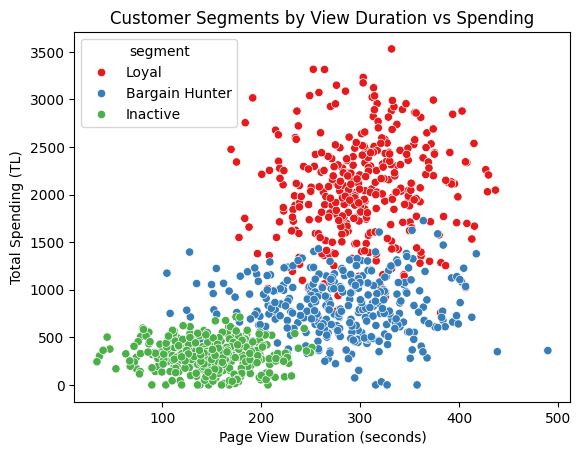

In [2]:
sns.scatterplot(data=df, x="view_duration", y="total_spending", hue="segment", palette="Set1")
plt.title("Customer Segments by View Duration vs Spending")
plt.xlabel("Page View Duration (seconds)")
plt.ylabel("Total Spending (TL)")
plt.show()

In [3]:
df.groupby("segment").agg({
    "view_duration": "mean",
    "category_count": "mean",
    "cart_addition_count": "mean",
    "cart_abandonment_rate": "mean",
    "purchase_frequency": "mean",
    "total_spending": ["mean", "median", "max"]
})

view_duration category_count cart_addition_count  \
                        mean           mean                mean   
segment                                                           
Bargain Hunter    280.307973      12.774775            3.522523   
Inactive          149.309224       2.459459            0.501502   
Loyal             302.953250       9.491018            5.997006   

               cart_abandonment_rate purchase_frequency total_spending  \
                                mean               mean           mean   
segment                                                                  
Bargain Hunter              0.544680           1.996997     820.764687   
Inactive                    0.792120           0.528529     310.570667   
Loyal                       0.099194           9.362275    2054.190126   

                                          
                     median          max  
segment                                   
Bargain Hunter   802.060476  1726.146545  
Inactive         312.608765   714.896942  
Loyal           2053.882246  3530.547607

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Veriyi yükle
df = pd.read_csv("simulated_customer_data.csv")

# Özellikleri seç (segment sütununu çıkar)
features = df[[
    "view_duration", "category_count", "cart_addition_count",
    "cart_abandonment_rate", "purchase_frequency", "total_spending"
]]

# Veriyi ölçekle (standartlaştırma)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

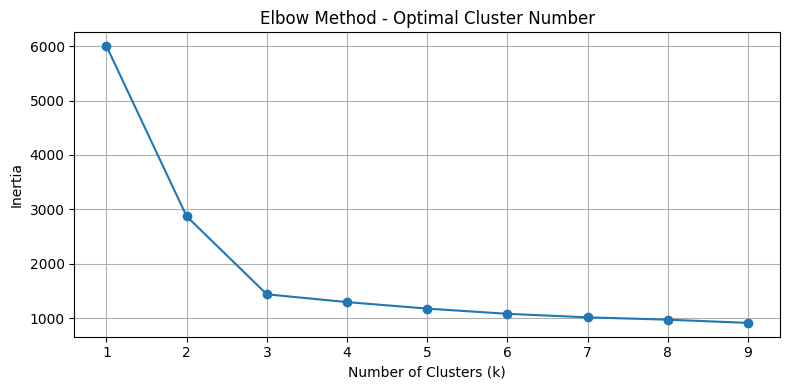

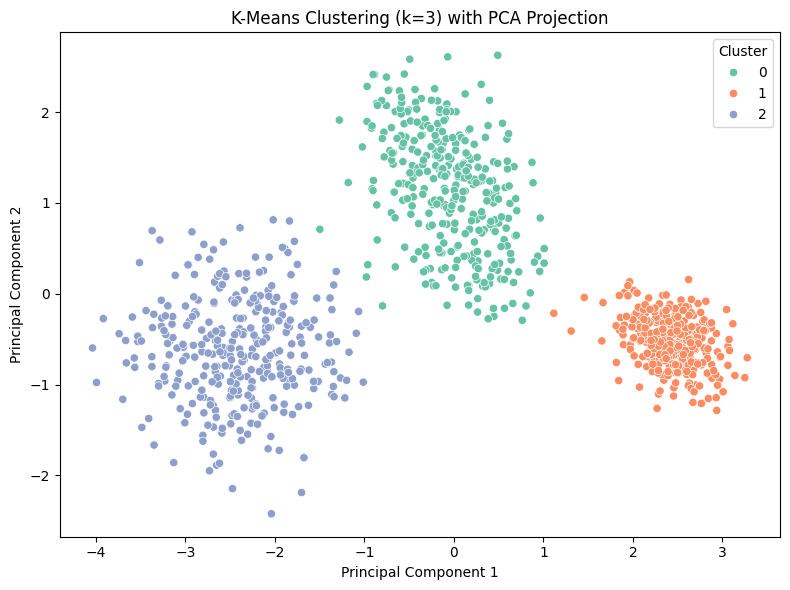

In [13]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükle
df = pd.read_csv("simulated_customer_data.csv")

# Özellikleri seç ve ölçekle
features = df[[
    "view_duration", "category_count", "cart_addition_count",
    "cart_abandonment_rate", "purchase_frequency", "total_spending"
]]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# 🔍 Elbow yöntemi ile en uygun k değerini belirle
inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    inertia.append(kmeans.inertia_)

# Elbow grafiğini çiz
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method - Optimal Cluster Number")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

# ✅ k=3 ile K-Means kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
df["kmeans_cluster"] = kmeans.fit_predict(scaled)

# PCA ile görselleştirme için 2 boyuta indir
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
df["pca1"] = pca_result[:, 0]
df["pca2"] = pca_result[:, 1]

# Kümeleme görselleştirmesi
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="kmeans_cluster", palette="Set2")
plt.title("K-Means Clustering (k=3) with PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

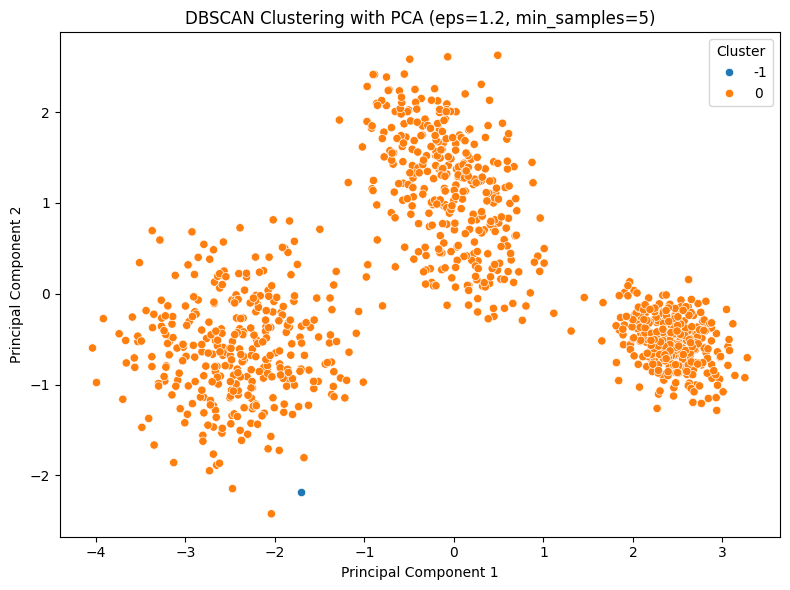

In [12]:
# Özellikleri seç ve ölçekle
features = df[[
    "view_duration", "category_count", "cart_addition_count",
    "cart_abandonment_rate", "purchase_frequency", "total_spending"
]]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# DBSCAN uygulama
dbscan = DBSCAN(eps=1.2, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# PCA ile boyut indir
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Sonuçları dataframe'e ekle
df['dbscan_cluster'] = clusters
df['pca1'] = pca_result[:, 0]
df['pca2'] = pca_result[:, 1]

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="dbscan_cluster", palette="tab10", legend="full")
plt.title("DBSCAN Clustering with PCA (eps=1.2, min_samples=5)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

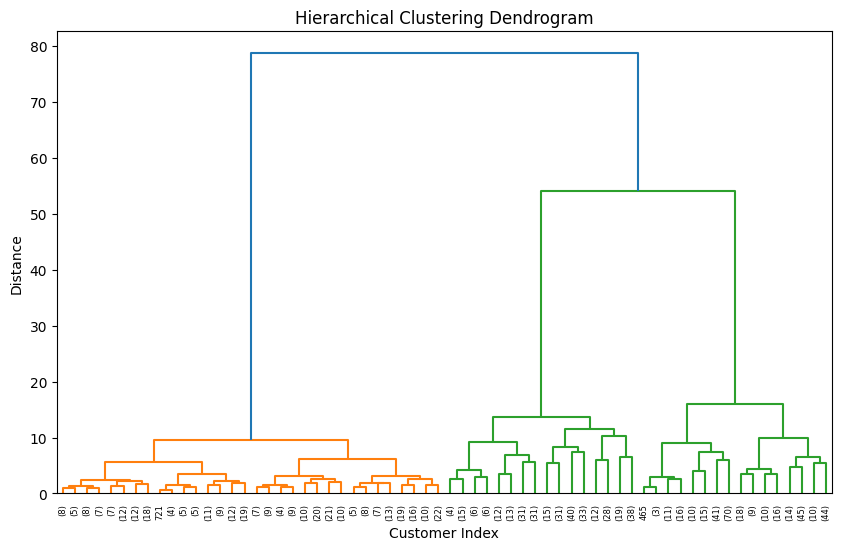

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Customer Index")
plt.ylabel("Distance")
plt.show()